In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
import h5py


In [2]:
# Define the paths to train, validation, and test datasets
base_dir = "updated_images"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")


In [3]:
# Image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Data generators
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Verify class distribution
print("Classes:", train_gen.class_indices)


Found 2625 images belonging to 5 classes.
Found 525 images belonging to 5 classes.
Found 350 images belonging to 5 classes.
Classes: {'Abyssinian_cat': 0, 'Bengal_cat': 1, 'British_Shorthair_cat': 2, 'Siamese_cat': 3, 'Sphynx_cat': 4}


In [4]:
# Function to build models
def build_model(base_model, num_classes, input_shape=(224, 224, 3)):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Set input shape to match pre-trained weights
input_shape = (224, 224, 3)

# Get the number of classes dynamically
num_classes = len(train_gen.class_indices)

# Create models with consistent input shapes
resnet_model = build_model(ResNet50(weights='imagenet', include_top=False, input_shape=input_shape), num_classes, input_shape)
densenet_model = build_model(DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape), num_classes, input_shape)
mobilenet_model = build_model(MobileNetV3Small(weights='imagenet', include_top=False, input_shape=input_shape), num_classes, input_shape)


C:\Users\User\anaconda3\envs\skibidiproject\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.2959 - loss: 1.6207 - val_accuracy: 0.2019 - val_loss: 1.6382
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.3433 - loss: 1.5494 - val_accuracy: 0.2229 - val_loss: 1.5574
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.3868 - loss: 1.4776 - val_accuracy: 0.3448 - val_loss: 1.4988
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.3829 - loss: 1.4642 - val_accuracy: 0.4229 - val_loss: 1.4470
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.3983 - loss: 1.4689 - val_accuracy: 0.4781 - val_loss: 1.3872
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.3931 - loss: 1.4532 - val_accuracy: 0.4876 - val_loss: 1.3476
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4170 - loss: 1.3939 - val_accuracy: 0.4819 - val_loss: 1.3250
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.3890 - loss: 1.4198 - val_accuracy: 0.4876 - v

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4214 - loss: 1.6077 - val_accuracy: 0.9010 - val_loss: 0.4080
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8265 - loss: 0.5089 - val_accuracy: 0.9410 - val_loss: 0.2534
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8646 - loss: 0.3860 - val_accuracy: 0.9543 - val_loss: 0.2044
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8925 - loss: 0.3446 - val_accuracy: 0.9505 - val_loss: 0.1876
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.8874 - loss: 0.3307 - val_accuracy: 0.9543 - val_loss: 0.1746
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9051 - loss: 0.3041 - val_accuracy: 0.9581 - val_loss: 0.1760
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9057 - loss: 0.2956 - val_accuracy: 0.9486 - val_loss: 0.1711
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9145 - loss: 0.2618 - val_accuracy: 0.9505 - v

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 63s 633ms/step - accuracy: 0.2387 - loss: 1.6288 - val_accuracy: 0.2095 - val_loss: 1.6032
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 603ms/step - accuracy: 0.3502 - loss: 1.4805 - val_accuracy: 0.3143 - val_loss: 1.5897
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 590ms/step - accuracy: 0.3765 - loss: 1.4567 - val_accuracy: 0.3600 - val_loss: 1.5656
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 578ms/step - accuracy: 0.3886 - loss: 1.4196 - val_accuracy: 0.3486 - val_loss: 1.5424
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 51s 612ms/step - accuracy: 0.4022 - loss: 1.4109 - val_accuracy: 0.3943 - val_loss: 1.5007
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 604ms/step - accuracy: 0.4007 - loss: 1.4120 - val_accuracy: 0.4000 - val_loss: 1.4534
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 52s 621ms/step - accuracy: 0.3936 - loss: 1.4340 - val_accuracy: 0.4171 - val_loss: 1.4215
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 53s 641ms/step - accuracy: 0.4025 - loss: 1.3942 - val_accu

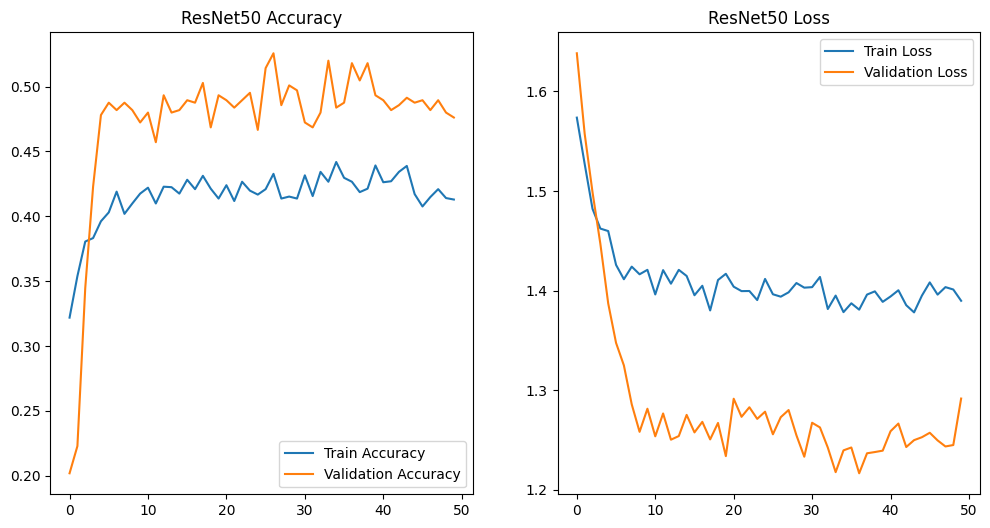

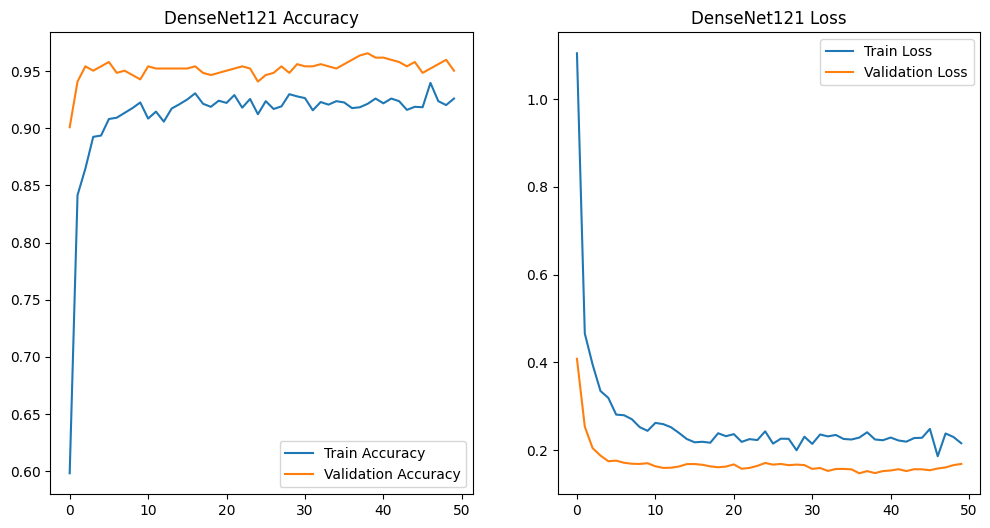

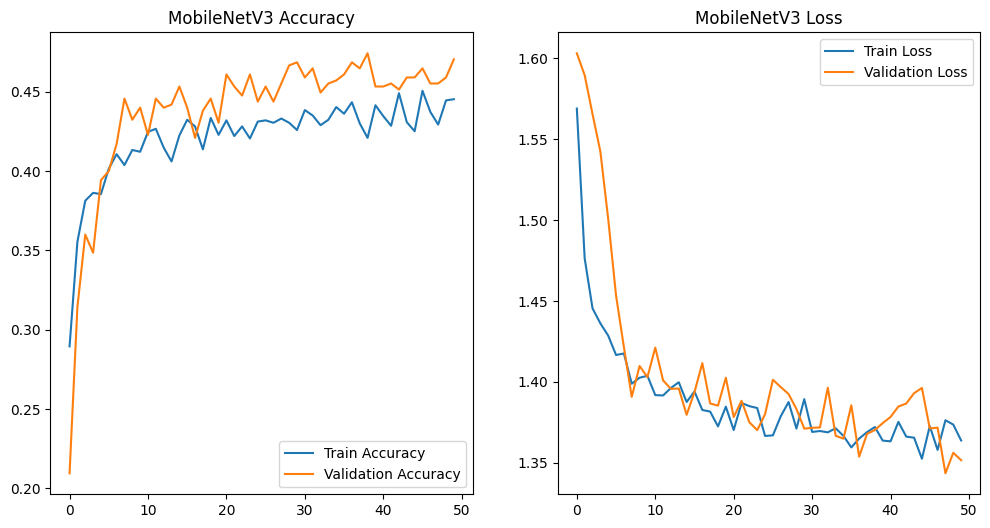

In [6]:
# Plot training results
def plot_history(history, model_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()

plot_history(resnet_history, "ResNet50")
plot_history(densenet_history, "DenseNet121")
plot_history(mobilenet_history, "MobileNetV3")


11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
ResNet50 Classification Report:
                       precision    recall  f1-score   support

       Abyssinian_cat       0.30      0.20      0.24        70
           Bengal_cat       0.49      0.81      0.61        70
British_Shorthair_cat       0.36      0.53      0.43        70
          Siamese_cat       0.67      0.49      0.56        70
           Sphynx_cat       0.58      0.27      0.37        70

             accuracy                           0.46       350
            macro avg       0.48      0.46      0.44       350
         weighted avg       0.48      0.46      0.44       350



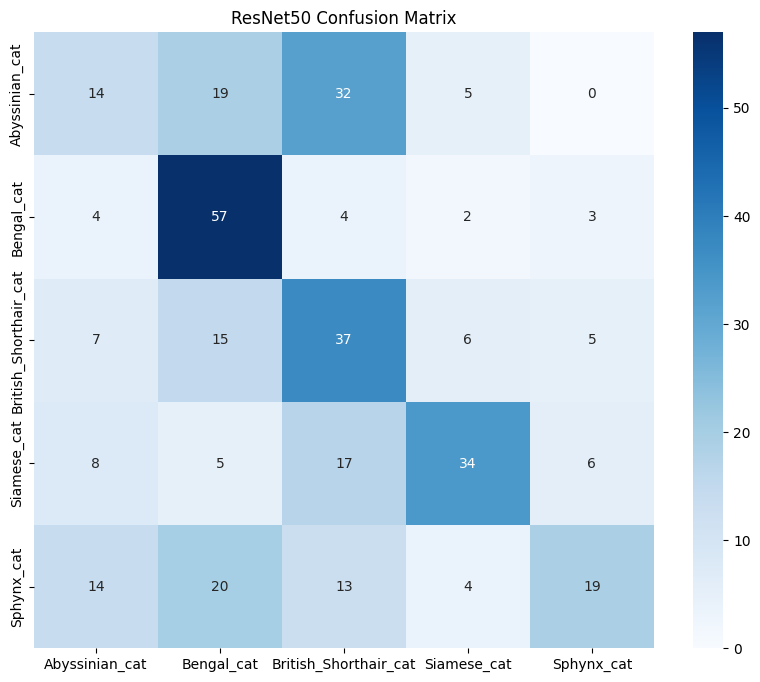

11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step 
DenseNet121 Classification Report:
                       precision    recall  f1-score   support

       Abyssinian_cat       0.92      0.80      0.85        70
           Bengal_cat       0.94      0.90      0.92        70
British_Shorthair_cat       0.85      0.90      0.88        70
          Siamese_cat       0.96      0.99      0.97        70
           Sphynx_cat       0.89      0.97      0.93        70

             accuracy                           0.91       350
            macro avg       0.91      0.91      0.91       350
         weighted avg       0.91      0.91      0.91       350



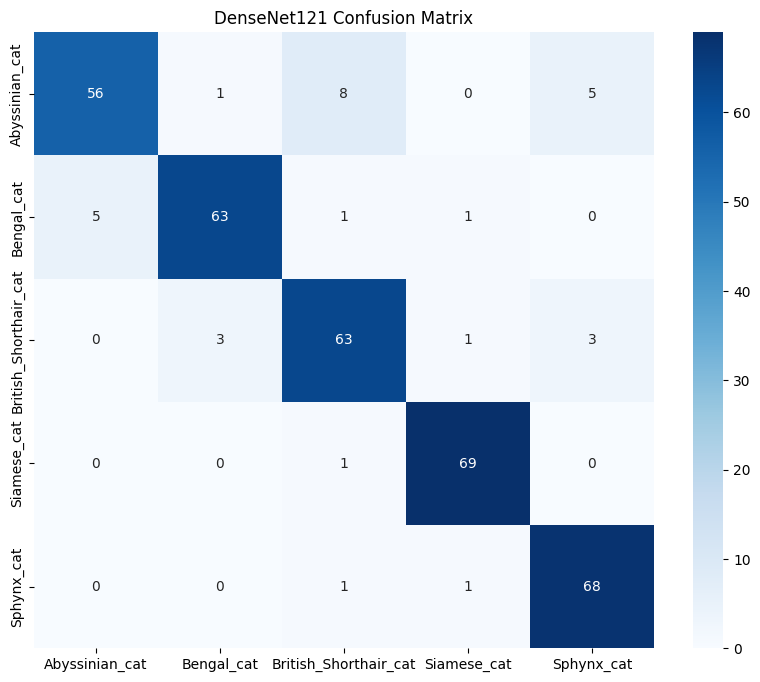

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step
MobileNetV3 Classification Report:
                       precision    recall  f1-score   support

       Abyssinian_cat       0.24      0.20      0.22        70
           Bengal_cat       0.59      0.84      0.69        70
British_Shorthair_cat       0.28      0.36      0.32        70
          Siamese_cat       0.53      0.37      0.44        70
           Sphynx_cat       0.27      0.21      0.24        70

             accuracy                           0.40       350
            macro avg       0.38      0.40      0.38       350
         weighted avg       0.38      0.40      0.38       350



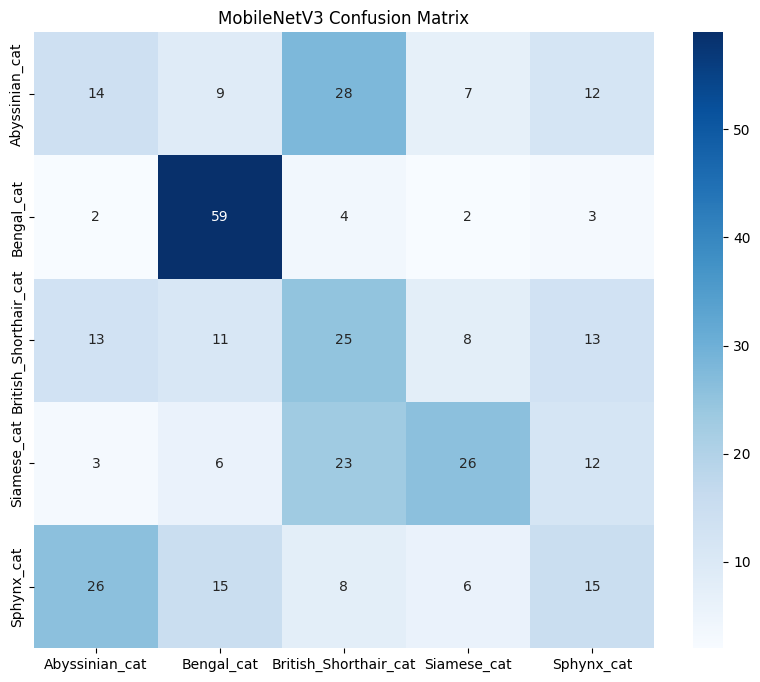

In [7]:
# Evaluate each model on the test set
def evaluate_model(model, test_gen, model_name):
    y_pred = model.predict(test_gen)
    y_true = test_gen.classes
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred_labels, target_names=test_gen.class_indices.keys()))
    
    cm = confusion_matrix(y_true, y_pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

evaluate_model(resnet_model, test_gen, "ResNet50")
evaluate_model(densenet_model, test_gen, "DenseNet121")
evaluate_model(mobilenet_model, test_gen, "MobileNetV3")
